# Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). Dataquest has made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll pretend our stakeholders want to know the following:

```
Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?
What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? 
What about older employees?
```

We will try to combine the results for both surveys to answer these questions. However, although both used the same survey template, the TAFE dataset has customized some of the answers. A data dictionary wasn't provided with the dataset so for this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

```
- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE
```
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

```
- Record ID: An id used to identify the participant of the survey

- Reason for ceasing employment: The reason why the person's employment ended

- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
pd.options.display.max_columns = 150 # to avoid truncated output 

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


## Data cleaning and validation

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.isnull().sum().sort_values(ascending=False) * 100. / len(dete_survey)

Torres Strait                          99.635036
South Sea                              99.148418
Aboriginal                             98.053528
Disability                             97.201946
NESB                                   96.107056
Business Unit                          84.671533
Classification                         44.647202
Opportunities for promotion            10.583942
Career Aspirations                      9.245742
Wellness programs                       6.812652
Coach                                   6.690998
Further PD                              6.569343
Workplace issue                         4.136253
Feedback                                3.649635
Health & Safety                         3.527981
Gender                                  2.919708
Professional Development                1.703163
Stress and pressure support             1.459854
Skills                                  1.338200
Age                                     1.338200
Peer support        

Already we can see that some of the rows have entries like `Not Stated` which are better represented by `NULL` values. Additionally, several of the columns including `Torres Strait`, `South Sea`, `Aboriginal`, `Disability`, `NESB`, & `Business Unit` have a very large proportions of missing data.

Next let's look at the TAFE data.

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
tafe_survey.isnull().sum().sort_values(ascending=False) * 100. / len(tafe_survey)

Main Factor. Which of these was the main factor for leaving?                                                                                                     83.903134
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    38.461538
Contributing Factors. Ill Health                                                                                                                                 37.749288
Contributing Factors. Maternity/Family                                                                                                                           37.749288
Contributing Factors. Career Move - Public Sector                                                                                                                37.749288
Contributing Factors. NONE                                                                                                                       

Right off the bat we can tell that the column names for this dataset, however descriptive, are going to be a problem for visualization and will need to be changed to match the corresponding columns in the DETE set. 

Another issue we notice is that the responses to the non-boolean questions are recorded differently between the two datasets. The TAFE records responses using the standard scale `Strongly Agree, Agree, Neither Agree/Disagree, Disagree, Strongly Disagree`, while the DETE set appears to use the notation `SA, A, N, D, SD`

This set also has frequent label for data: the string `"-"` which can often indicate `NULL` values. However, based on the other values in columns with this value, it is more likely this value represents the value `FALSE` which we will address later. 

In terms of columns missing data, it's unfortunate for our analysis that many of the responses to the question `Main Factor. Which of these was the main factor for leaving?` are missing. Moreover, many of the questions falling under the `Contributing Factors` questions are missing a significant number of responses, though it is suspect that they are all missing almost exactly the same percentage of responses. We'll have to explore this later. 

For now let's get the extra missing value labels correctly identified.

In [8]:
cond = dete_survey.isin(['Not Stated'])
dete_survey[cond] = np.nan

Next let's try to drop some of the columns we won't be using in our analysis and relabel the remaining columns to make them consistent between the two datasets.

After looking over many of the columns, these are the ones we will elect to drop. Note that although many of these columns likely contain information about whether the employee was dissatissfied with their job or not, we do have several columns which more directly answer the question. However, in a real-world scenario it might be interesting to explore if people who indicated that they were dissatissfied used these questions to indicate **how** they were dissatisfied or conversely if people who indicated that they were **not** dissatisfied with their job nevertheless indicated in these questions that they were actually dissatisfied. 

In [9]:
print(dete_survey.columns[28:49])
print(tafe_survey.columns[17:66])

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')
Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the j

In [10]:
# Drop columns we will not be using in analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [11]:
# Standardize column labels for dete data
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(" ", "_")
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [12]:
# Rename tafe column labels to match dete columns
rename_cols_map = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment':'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated = tafe_survey_updated.rename(rename_cols_map, axis=1)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


Next let's investigate the different values in a particularly important column: the `separationtype`. This column represents the different reasons the individual being interviewed left the programs.

In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Based on our introduction, we're interested in employees who left due to dissatisfaction with their work, rather than were terminated, transfered, or retired. Thus, we'll filter based on the value `Resignation` in the TAFE survey. On the other hand, we note that the DETE survey lists 3 different types of resignation: `Other reasons`, `Other employer`, and `Move overseas/interstate`. It's not immediately clear if any of these values preclude dissatisfaction, so we'll filter based on all of them.

In [15]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [16]:
# Select rows of interest
cond = dete_survey_updated['separationtype'] == 'Resignation'
dete_resignations = dete_survey_updated[cond].copy()

cond = tafe_survey_updated['separationtype'] == 'Resignation'
tafe_resignations = tafe_survey_updated[cond].copy()

Now that we have a subset of the data that is worth investigating, let's do a little spot cleaning before we jump into analysis. Typical hotspots of data problems are dates/datetimes, so we begin there. The DETE data contains both a start date (in `dete_start_date`) and termination date (in `cease_date`):

In [17]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [18]:
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype("float")
dete_resignations['dete_start_date'].value_counts().sort_index().head(10)

1963.0    1
1971.0    1
1972.0    1
1973.0    1
1974.0    2
1975.0    1
1976.0    2
1977.0    1
1980.0    5
1982.0    1
Name: dete_start_date, dtype: int64

The start dates are only listed to the year, while the termination dates have a mixed formatting. Let's make that more consistent.

In [19]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype("float")
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [20]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

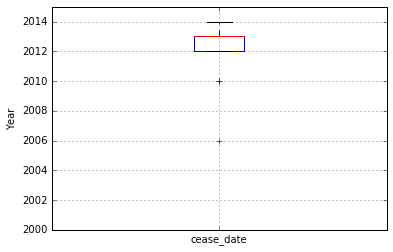

In [21]:
ax = dete_resignations.boxplot(column='cease_date')
ax.set_ylim(2000,2015), ax.set_ylabel('Year')
plt.show()

The TAFE data contains a column which we renamed to `institute_service` which contains how long the interviewee worked with TAFE. However, the DETE data does not contain such a column. We will infer the `institute_service` values for the DETE data based on the difference in values between a row's `cease_date` and `dete_start_date`.

In [22]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']

## Identifying dissatisfied employees

In the DETE dataset there are several columns which might reflect if an employee was leaving their job as a result of dissatisfaction:

```
- job_dissatisfaction
- dissatisfaction_with_the_department
- lack_of_recognition
- lack_of_job_security
- interpersonal_conflicts
- physical_work_environment
- employment_conditions
- work_life_balance
- workload
```

Most of these are fairly obvious, but two that might not be are `interpersonal_conflicts` and `physical_work_environment`. We're including `interpersonal_conflicts` because it might represent an employee who left because of conflicts with either their supervisor(s) or co-worker(s) which we might broadly use to indicate "dissatisfaction with peers." On the other hand, if an employee indicated that they were leaving because of the physical workplace itself, it might indicate that they felt the workplace was unsafe and so worth including in our analysis.

For the TAFE set, we've excluded the columns using the Likert scale for ease of analysis, but looking over some of the questions being asked we note that there are several columns which could be useful for determining if the employee was dissatisfied or not. In the future, it might be interesting to include these columns, converting them to boolean values and using them to indicate employee dissatisfaction. For now, we'll continue to exclude these columns and use the remaining `Contributing Factors ` columns to indicate dissatisfaction:

```
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
```
First we'll have to convert these columns into true booleans for comparison.

In [26]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [36]:
# Function to convert Contributing Factors columns in the TAFE data to boolean values
def convert_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True

tafe_resignations['dissatisfaction'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(convert_vals).any(axis=1, skipna=False)
tafe_resignations['dissatisfaction'].value_counts(dropna=False)
tafe_resignations['institute'] = 'TAFE'

In [35]:
cols = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'lack_of_recognition',
    'lack_of_job_security',
    'interpersonal_conflicts',
    'physical_work_environment',
    'employment_conditions',
    'work_life_balance',
    'workload',
]

dete_resignations['dissatisfaction'] = dete_resignations[cols].any(axis=1, skipna=False)
dete_resignations['dissatisfaction'].value_counts(dropna=False)
dete_resignations['institute'] = 'DETE'

In [50]:
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)
combined_update = combined.dropna(axis=1, thresh=500).copy() # drop columns with many null values

In [51]:
combined_update['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [52]:
combined_update['institute_service'] = combined_update['institute_service'].astype(str).str.extract(r'(\d+)', expand=False).astype('float')
combined_update['institute_service'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

To facilitate analysis, lets bin employees based on their service length according to 

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [54]:
def career_binning(val):
    if pd.isnull(val):
        return np.nan
    if val < 3.:
        return "New"
    elif 3 <= val < 7:
        return "Experienced"
    elif 7 <= val < 10:
        return "Established"
    else:
        return "Veteran"
    
combined_update['service_cat'] = combined_update['institute_service'].apply(career_binning)

In [55]:
combined_update.head()

,age,cease_date,dissatisfaction,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7.0,Teacher,Resignation,Established
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Resignation,Veteran
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3.0,Teacher,Resignation,Experienced
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15.0,Teacher Aide,Resignation,Veteran
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3.0,Teacher,Resignation,Experienced


In [56]:
combined_update['dissatisfaction'].value_counts(dropna=False)

False    405
True     238
NaN        8
Name: dissatisfaction, dtype: int64

In [57]:
combined_update = combined_update.fillna({'dissatisfaction': False})

In [60]:
pivot = combined_update.pivot_table(values='dissatisfaction', index='service_cat', aggfunc=np.mean)

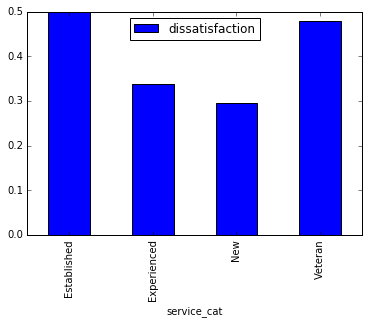

In [62]:
pivot.plot(kind='bar')
plt.show()